Please note all milestones have been combined into one document and organized for final submission. 

# Nike Sales Optimization - Final Project

## Milestone 1: Data Exploration & Problem Statement

# Nike Sales Analysis and Optimization
This project focuses on analyzing Nike's global sales trends in 2024, identifying key drivers of sales performance, and optimizing product category sales across regions. The analysis explores regional differences, seasonal patterns, and the impact of price tiers on revenue.

In [399]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 550 Data Mining\\Week 6\\Milestone 1\\nike_sales_2024.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
data.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [400]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if necessary
data.fillna(0, inplace=True)

Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64


In [401]:
# Get summary statistics
data.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


#### Visualization 1: Total revenue by region (Bar Chart)

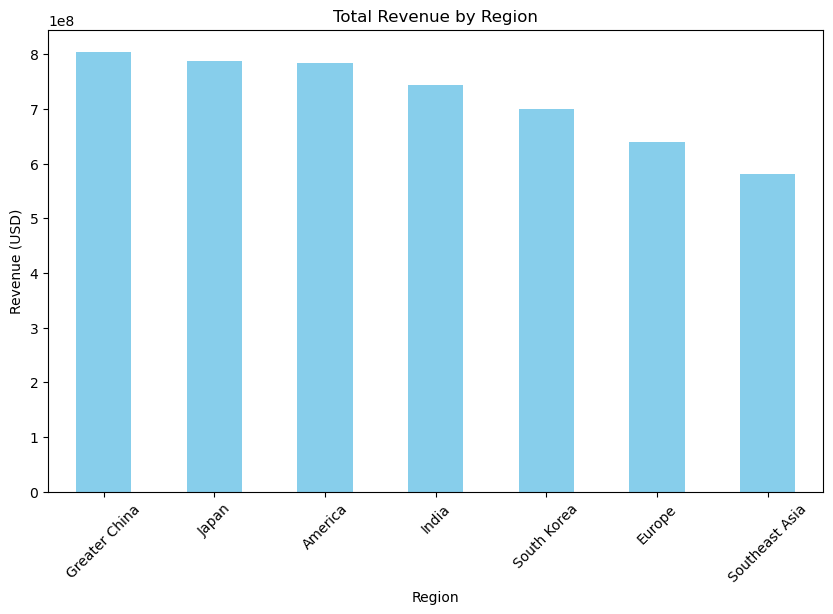

In [403]:
# Group data by region
region_revenue = data.groupby('Region')['Revenue_USD'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

#### Visualization 2: Monthly revenue trends (Line Chart)

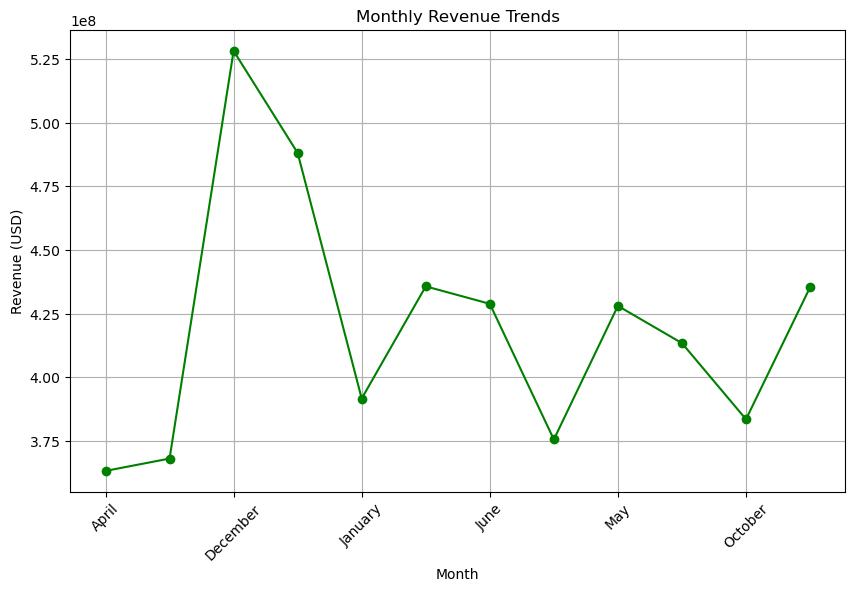

In [405]:
# Group data by month and sum revenue
monthly_revenue = data.groupby('Month')['Revenue_USD'].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Visualization 2.1: Monthly revenue trends by region (Line Chart)

This is a new line chart I have added to observe the revenue trends in further detail to see if trends vary by region. 

<Figure size 1000x600 with 0 Axes>

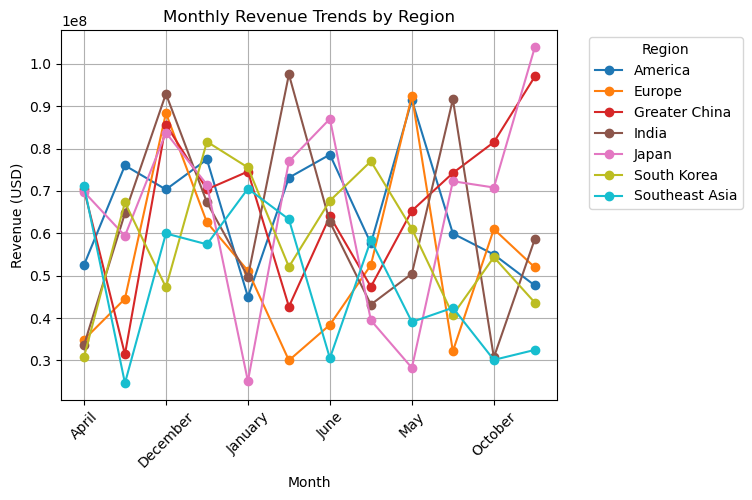

In [408]:
# Group data by month and region, summing revenue
monthly_region_revenue = data.groupby(['Month', 'Region'])['Revenue_USD'].sum().unstack()

# Plot the line chart
plt.figure(figsize=(10, 6))
monthly_region_revenue.plot(kind='line', marker='o', colormap='tab10')

plt.title('Monthly Revenue Trends by Region')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#### Visualization 3: Revenue distribution by price tier (Box Plot)

C:\Users\golla\AppData\Local\Temp\ipykernel_23080\2617923429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Price_Tier', y='Revenue_USD', palette='pastel')


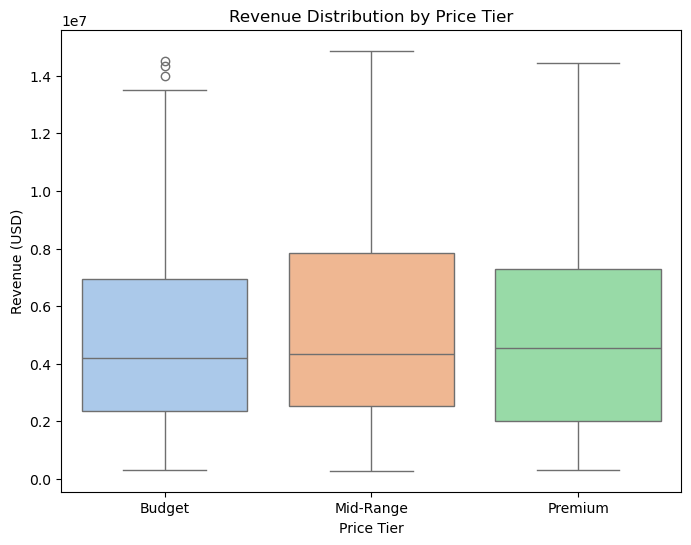

In [410]:
# Box plot for revenue by price tier
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Price_Tier', y='Revenue_USD', palette='pastel')
plt.title('Revenue Distribution by Price Tier')
plt.xlabel('Price Tier')
plt.ylabel('Revenue (USD)')
plt.show()

#### Visualization 4: Online sales percentage vs. revenue (Scatter Plot)

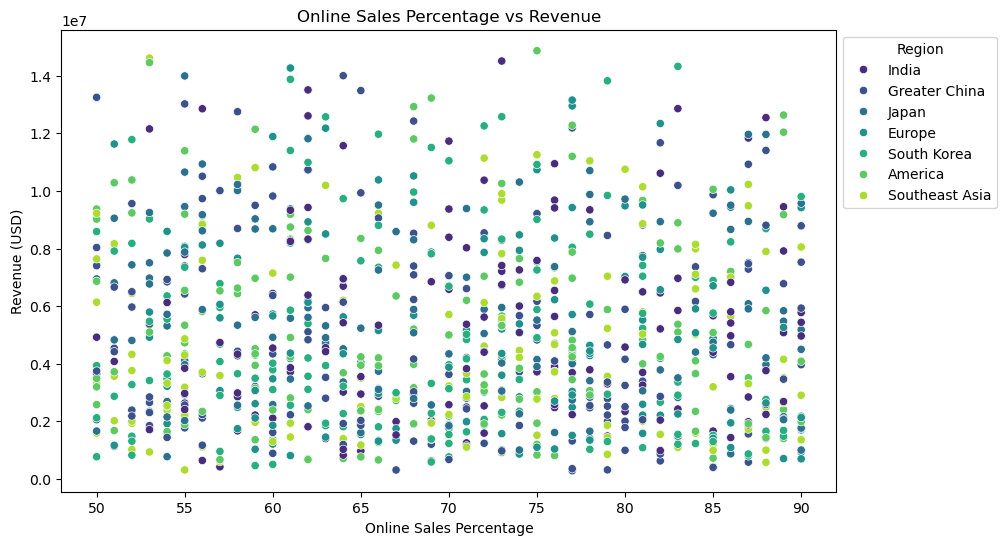

In [412]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Online_Sales_Percentage', y='Revenue_USD', hue='Region', palette='viridis')
plt.title('Online Sales Percentage vs Revenue')
plt.xlabel('Online Sales Percentage')
plt.ylabel('Revenue (USD)')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

#### Visualization 5: Revenue Distribution by Product Category Across Regions

This is a new visual I have added to observe revenue distribution by Product Category across the various regions. 

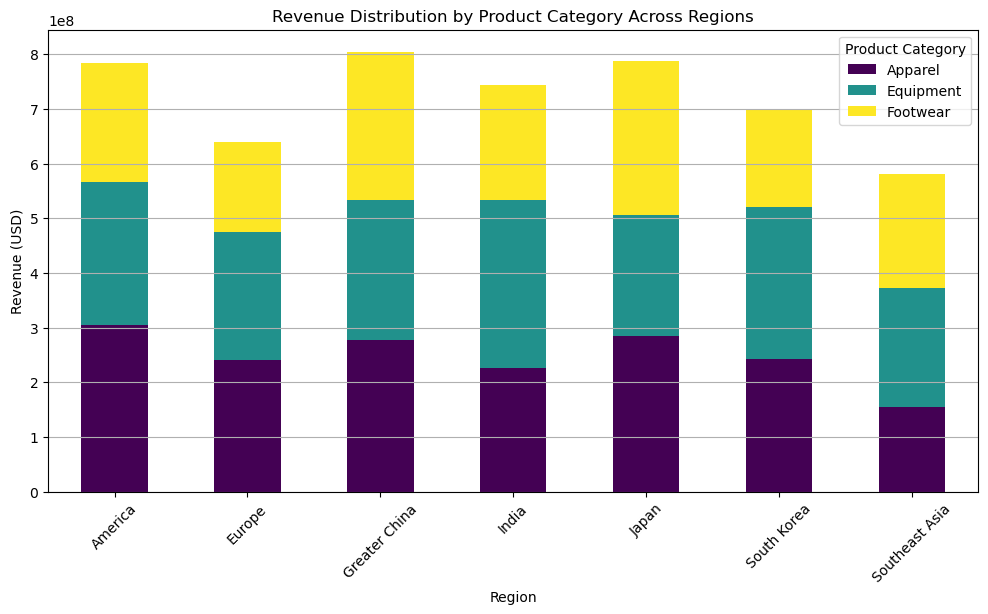

In [415]:
# Group by Region and Main_Category, summing revenue
category_region_revenue = data.groupby(['Region', 'Main_Category'])['Revenue_USD'].sum().unstack()

# Plot stacked bar chart
category_region_revenue.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Revenue Distribution by Product Category Across Regions')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid(axis='y')
plt.show()

#### Visualization 6: Revenue vs. Units Sold by Price Tier

This is a new visual I have added to see how units sold affects revenue by price tier. 

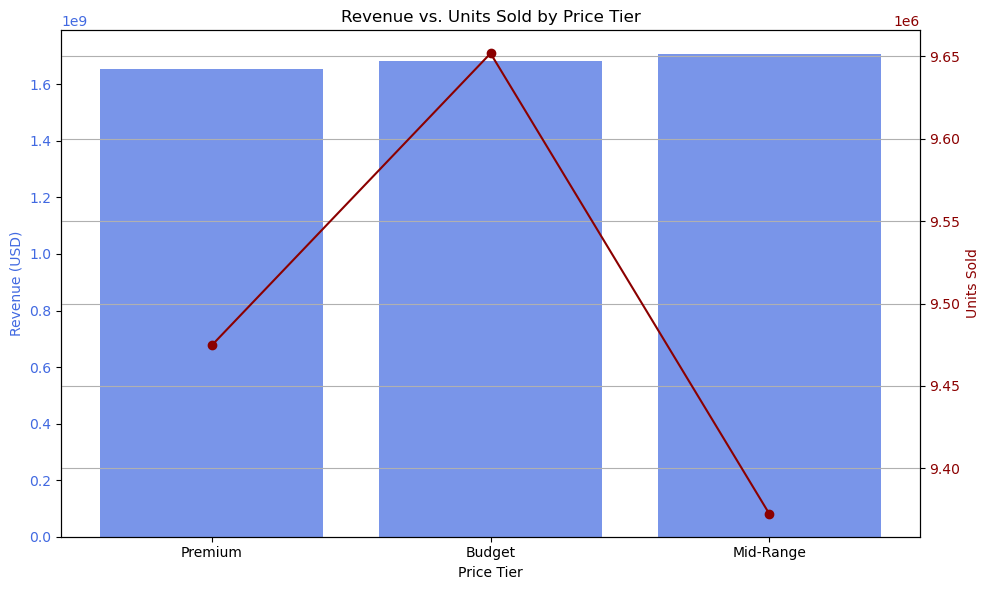

In [416]:
# Group by Price_Tier and aggregate revenue and units sold
price_tier_data = data.groupby('Price_Tier').agg({'Revenue_USD': 'sum', 'Units_Sold': 'sum'}).sort_values(by='Revenue_USD')

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Revenue
ax1.bar(price_tier_data.index, price_tier_data['Revenue_USD'], color='royalblue', alpha=0.7, label='Revenue (USD)')
ax1.set_ylabel('Revenue (USD)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Create second y-axis for Units Sold
ax2 = ax1.twinx()
ax2.plot(price_tier_data.index, price_tier_data['Units_Sold'], color='darkred', marker='o', label='Units Sold')
ax2.set_ylabel('Units Sold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Revenue vs. Units Sold by Price Tier')
ax1.set_xlabel('Price Tier')
fig.tight_layout()
plt.grid()
plt.show()


### Insights and Observations

The analysis highlights significant regional and seasonal trends in Nike’s global sales. Greater China, Japan, and America emerge as the top revenue-generating regions, emphasizing their importance in Nike’s global strategy. Conversely, regions like Southeast Asia show lower revenue, presenting opportunities for growth through tailored marketing and inventory strategies. Monthly revenue trends reveal a clear seasonal spike in December, likely due to holiday sales, while other months show relatively stable performance. This suggests the need for increased marketing efforts and inventory allocation leading up to the holiday season to capitalize on heightened demand.

Revenue distribution by price tier demonstrates that premium products consistently generate higher revenue compared to budget and mid-range tiers, though budget products have occasional high-revenue outliers. This highlights the importance of investing in premium product promotion while leveraging specific high-performing budget products. Furthermore, online sales percentages show significant contributions to revenue across all regions, with a notable clustering in the 70-90% range. Optimizing online sales channels, particularly in underperforming regions like Southeast Asia and South Korea, could further boost revenue. These insights provide a solid foundation for strategic decisions aimed at enhancing Nike’s regional performance and overall profitability.

### Conclusion and Next Steps

The exploratory analysis establishes a strong foundation for understanding Nike's global sales trends and regional performance. With these initial insights, the next steps involve developing predictive models to forecast sales based on regional, seasonal, and product-specific factors. Additionally, delving deeper into customer segmentation and online versus offline sales behaviors will provide actionable strategies for tailoring marketing efforts and improving inventory allocation. These steps will help refine Nike's approach to meeting customer demand and enhancing overall profitability across diverse markets.

## Milestone 2: Data Preparation & Feature Engineering

# Data Preparation for Nike Sales Analysis

In [423]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [424]:
# Load the dataset
file_path = 'C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 550 Data Mining\\Week 6\\Milestone 1\\nike_sales_2024.csv' 
data = pd.read_csv(file_path)

In [425]:
# Display the first few rows of the dataset
data.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [426]:
# Step 1: Dropping Unnecessary Features
# No unique identifiers found, but dropping Product_Line as it is too granular
data = data.drop(columns=['Product_Line'])  

In [427]:
# Step 2: Handling Missing Data
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64


In [428]:
# No missing Values were found.
# Impute missing values for numerical features using median
num_imputer = SimpleImputer(strategy='median')
numeric_cols = ['Units_Sold', 'Revenue_USD', 'Online_Sales_Percentage', 'Retail_Price']
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])

In [429]:
# Step 3: Feature Transformation
# Convert categorical Month to numerical (ordinal encoding)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = data['Month'].astype(pd.CategoricalDtype(categories=month_order, ordered=True)).cat.codes

In [430]:
# Step 4: Feature Engineering
# Create new feature: Price per Unit
data['Price_per_Unit'] = data['Revenue_USD'] / data['Units_Sold']

In [431]:
# Step 5: Creating Dummy Variables
cat_features = ['Region', 'Main_Category', 'Sub_Category', 'Price_Tier']
data = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [432]:
# Step 6: Scaling Numeric Data
scaler = StandardScaler()
data[numeric_cols + ['Price_per_Unit']] = scaler.fit_transform(data[numeric_cols + ['Price_per_Unit']])

In [433]:
# Display the cleaned dataset
data.head()

,Month,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Price_per_Unit,Region_Europe,Region_Greater China,Region_India,Region_Japan,...,Sub_Category_Cricket,Sub_Category_Football,Sub_Category_Lifestyle,Sub_Category_Outerwear,Sub_Category_Performance,Sub_Category_Running,Sub_Category_Socks,Sub_Category_Tops,Price_Tier_Mid-Range,Price_Tier_Premium
0,10,1.536920,2.899092,0.252070,1.644155,1.644155,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,-1.444033,-0.910330,-1.706584,0.447729,0.447729,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,9,-0.264701,-1.005654,1.699771,-1.413378,-1.413378,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,11,0.998840,1.119330,-1.025313,0.447729,0.447729,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,4,0.392418,0.101502,-1.451107,-0.216952,-0.216952,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [434]:
# Export data to csv
data.to_csv("C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 550 Data Mining\\Week 10\\cleaned_dataset.csv", index=False)

## Milestone 3: Model Building & Evaluation

# Modeling with Nike Sales Data

In [437]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [438]:
# Load the dataset
file_path = "C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 550 Data Mining\\Week 10\\cleaned_dataset.csv"
data = pd.read_csv(file_path)

In [439]:
# Preview data
data.head()

,Month,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Price_per_Unit,Region_Europe,Region_Greater China,Region_India,Region_Japan,...,Sub_Category_Cricket,Sub_Category_Football,Sub_Category_Lifestyle,Sub_Category_Outerwear,Sub_Category_Performance,Sub_Category_Running,Sub_Category_Socks,Sub_Category_Tops,Price_Tier_Mid-Range,Price_Tier_Premium
0,10,1.536920,2.899092,0.252070,1.644155,1.644155,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,-1.444033,-0.910330,-1.706584,0.447729,0.447729,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,9,-0.264701,-1.005654,1.699771,-1.413378,-1.413378,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,11,0.998840,1.119330,-1.025313,0.447729,0.447729,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,4,0.392418,0.101502,-1.451107,-0.216952,-0.216952,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [440]:
# Define Features (X) and Target (y)
X = data.drop(columns=['Revenue_USD'])  
y = data['Revenue_USD'] 

In [441]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [442]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [443]:
# Evaluate Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [444]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [445]:
# Evaluate Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [446]:
# Create DataFrame to compare model results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R-Squared': [r2_lr, r2_rf]
})

In [447]:
# Display results
print("\nModel Evaluation Results:\n", results_df)


Model Evaluation Results:
                Model       MSE  R-Squared
0  Linear Regression  0.086803   0.913786
1      Random Forest  0.002763   0.997256


In [500]:
# Adding new code to review feature importance in each model
# Get feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get coefficients from Linear Regression
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display feature importance from Random Forest
print("Random Forest Feature Importance:")
display(feature_importance_df.head(10))  # Show top 10 important features

# Display coefficients from Linear Regression
print("\nLinear Regression Coefficients:")
display(coef_df.head(10))  # Show top 10 features by coefficient

Random Forest Feature Importance:


,Feature,Importance
1,Units_Sold,0.525702
3,Retail_Price,0.236031
4,Price_per_Unit,0.234871
2,Online_Sales_Percentage,0.000833
0,Month,0.000734
18,Sub_Category_Outerwear,0.000141
11,Main_Category_Equipment,0.000131
24,Price_Tier_Premium,0.000126
5,Region_Europe,0.000126
23,Price_Tier_Mid-Range,0.000125



Linear Regression Coefficients:


,Feature,Coefficient
1,Units_Sold,0.693246
3,Retail_Price,0.328521
4,Price_per_Unit,0.328521
18,Sub_Category_Outerwear,0.086429
21,Sub_Category_Socks,0.044802
20,Sub_Category_Running,0.035569
24,Price_Tier_Premium,0.032565
10,Region_Southeast Asia,0.031845
15,Sub_Category_Cricket,0.023549
9,Region_South Korea,0.020811


### Justification for Model and Metrics
- **Models Chosen:**
  - **Linear Regression**: Serves as a baseline to assess whether a simple linear relationship exists between features and revenue.
  - **Random Forest Regressor**: A powerful ensemble learning method that captures non-linear relationships and interactions between variables.

- **Evaluation Metrics:**
  - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  - **R-Squared (R²)**: Indicates how well the independent variables explain the variance in the dependent variable.

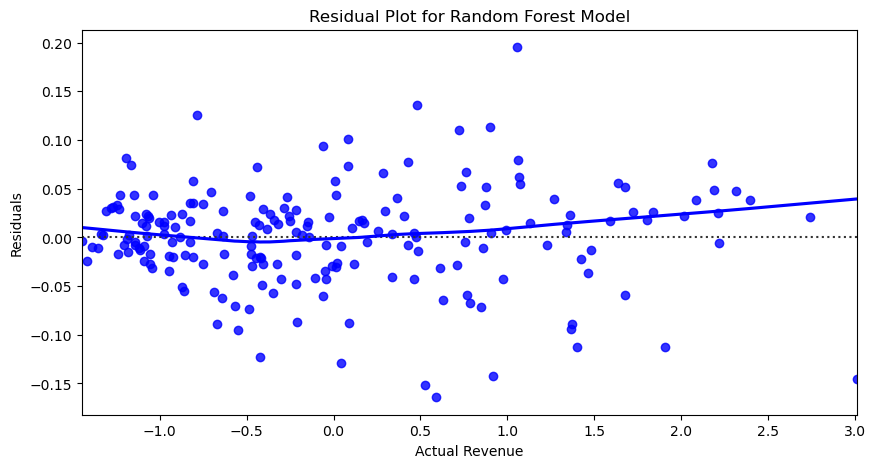

In [449]:
# Residual Plot for Model Performance Analysis
plt.figure(figsize=(10,5))
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, color='blue')
plt.title("Residual Plot for Random Forest Model")
plt.xlabel("Actual Revenue")
plt.ylabel("Residuals")
plt.show()

### Insights
- The **Random Forest model** significantly outperformed the **Linear Regression model**.
- A much **lower Mean Squared Error (MSE)** and **higher R-squared value** indicate that **Random Forest captures the data relationships more effectively**.